In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [5]:
# Load the dataset
data = pd.read_csv('advertising.csv')

# Define features and target
X = data.drop('sales', axis=1)
y = data['sales']

data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and train the decision tree
tree_model = DecisionTreeRegressor (max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

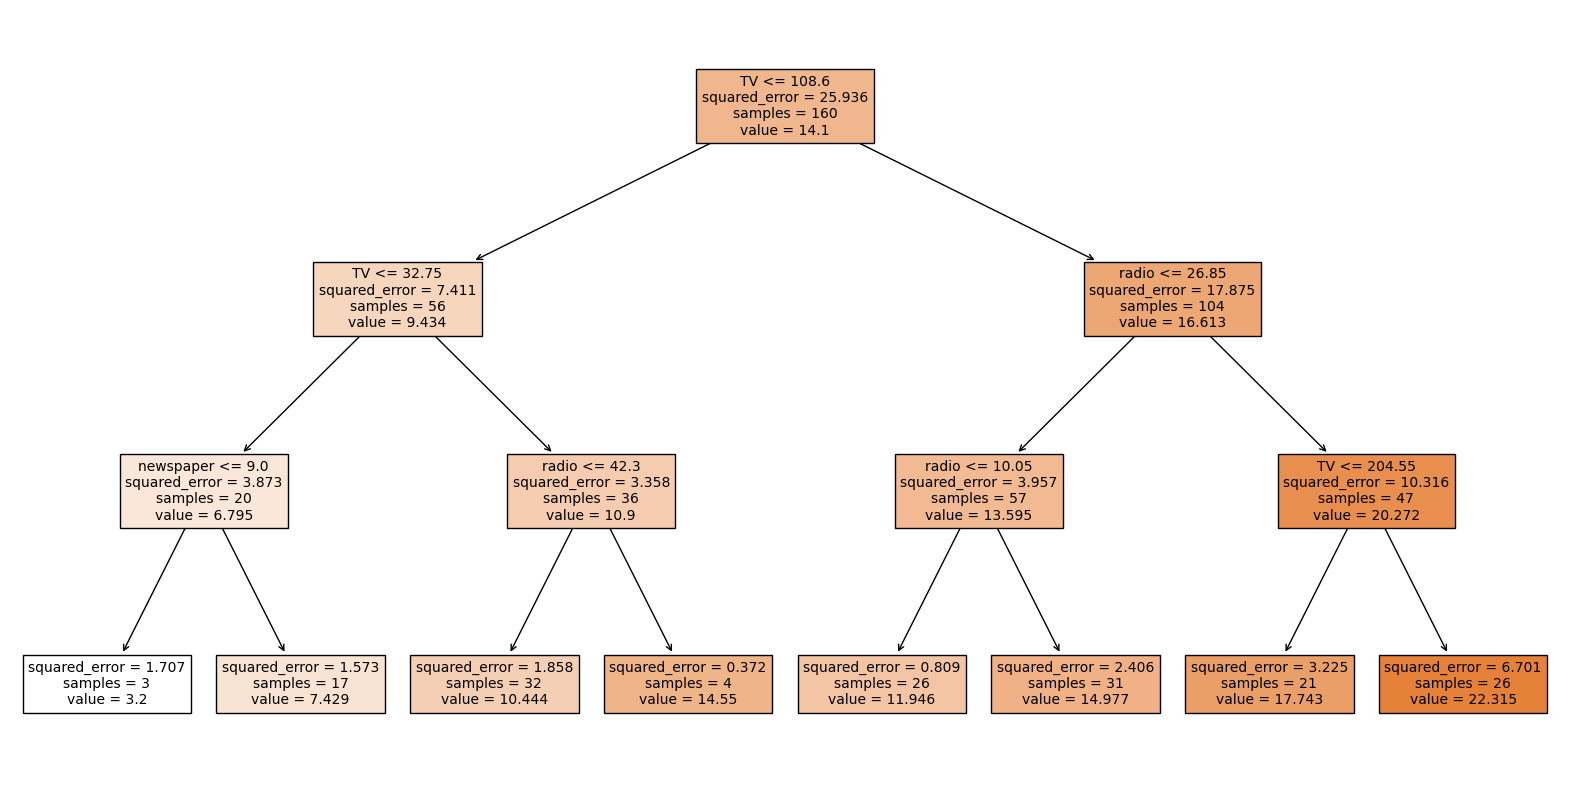

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=list(X.columns), filled=True, fontsize=10)
plt.show()

In [9]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize BaggingRegressor and AdaBoostRegressor with DecisionTreeRegressor as base estimator
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=2, random_state=42)
adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2), n_estimators=5, random_state=42)

In [10]:
# Train the decision tree using option 1: Bagging
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=2,
                 random_state=42)

In [11]:
# Train the decision tree using option 2: Boosting
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2), n_estimators=5,
                  random_state=42)

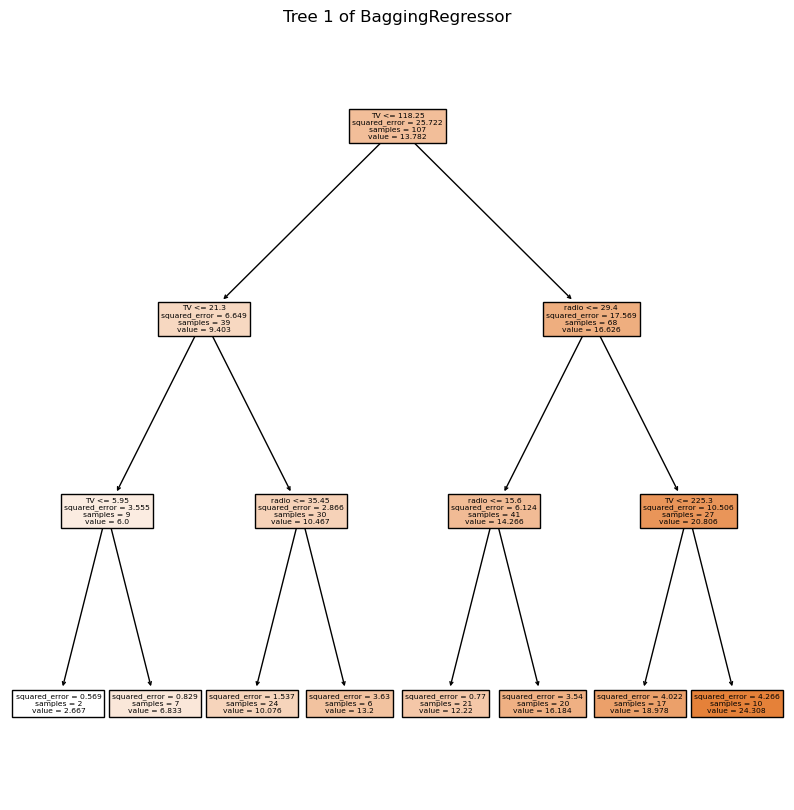

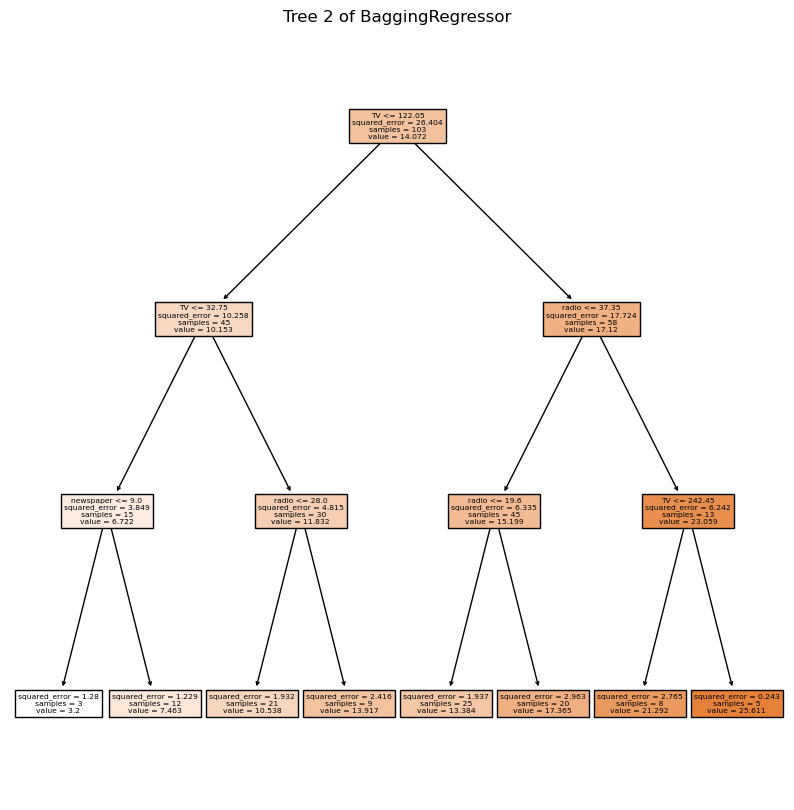

In [12]:
# Display decision trees for BaggingRegressor
for i, tree in enumerate(bagging_reg.estimators_):
    plt.figure(figsize=(10,10))
    plot_tree(tree, feature_names=list(X.columns), filled=True)
    plt.title(f"Tree {i+1} of BaggingRegressor")
    plt.show()

Applied weight is: 0.8997312450308694


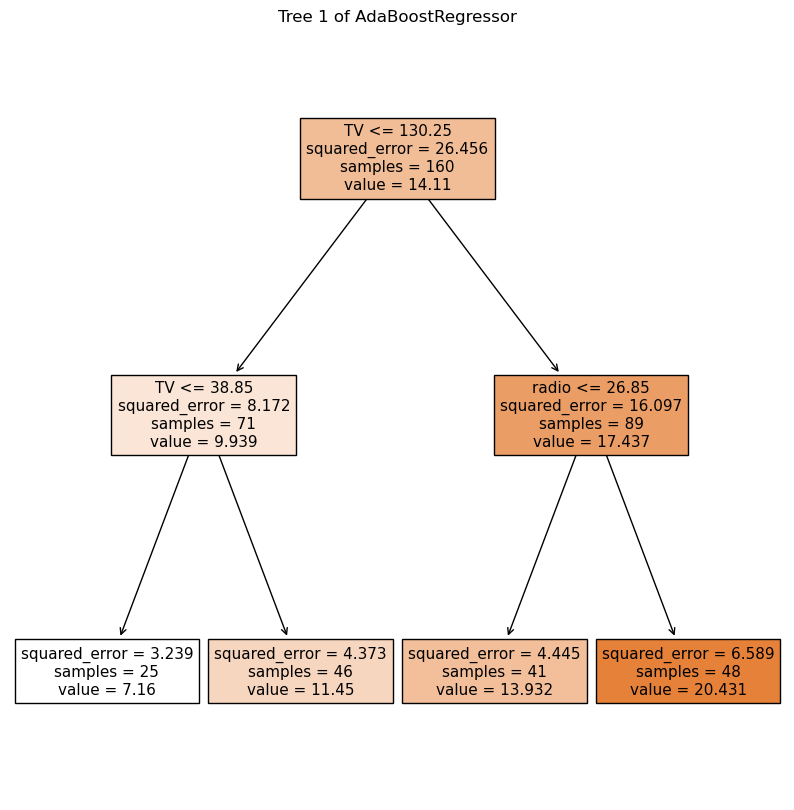

Applied weight is: 0.6868247813398508


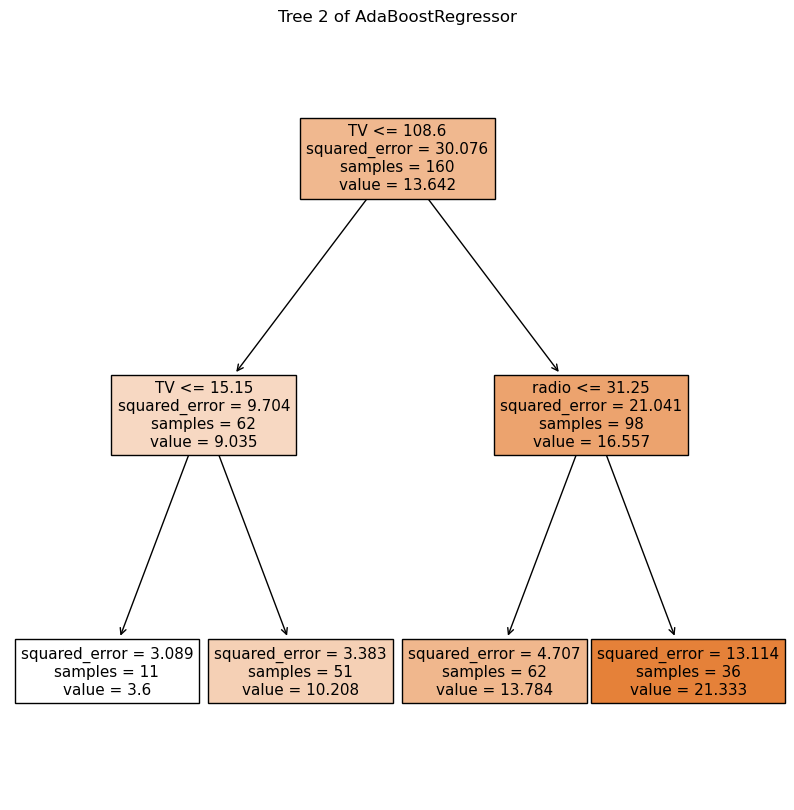

Applied weight is: 0.9351720406337855


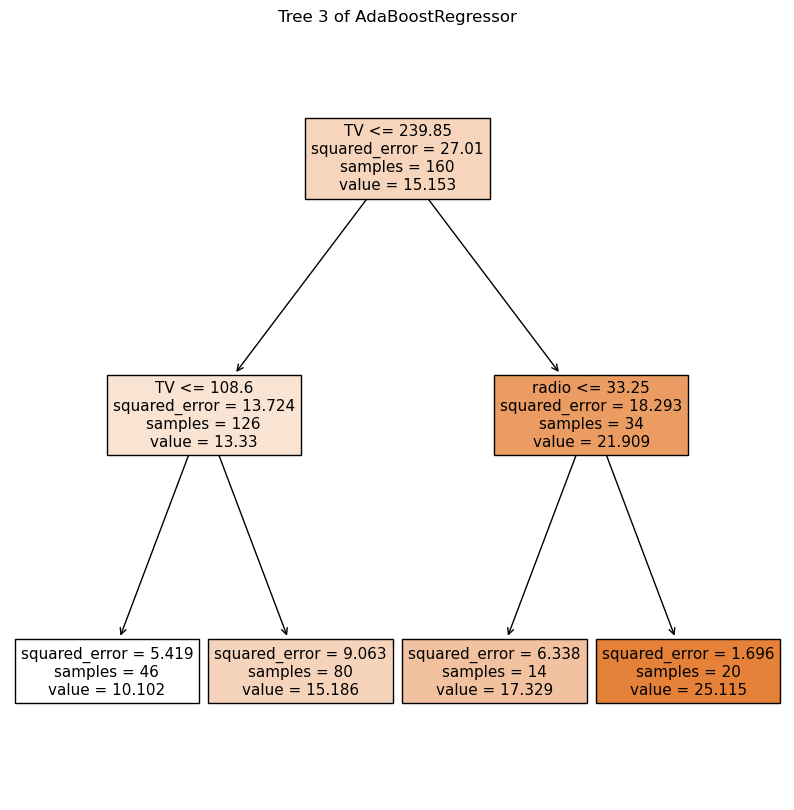

Applied weight is: 0.7383894360429961


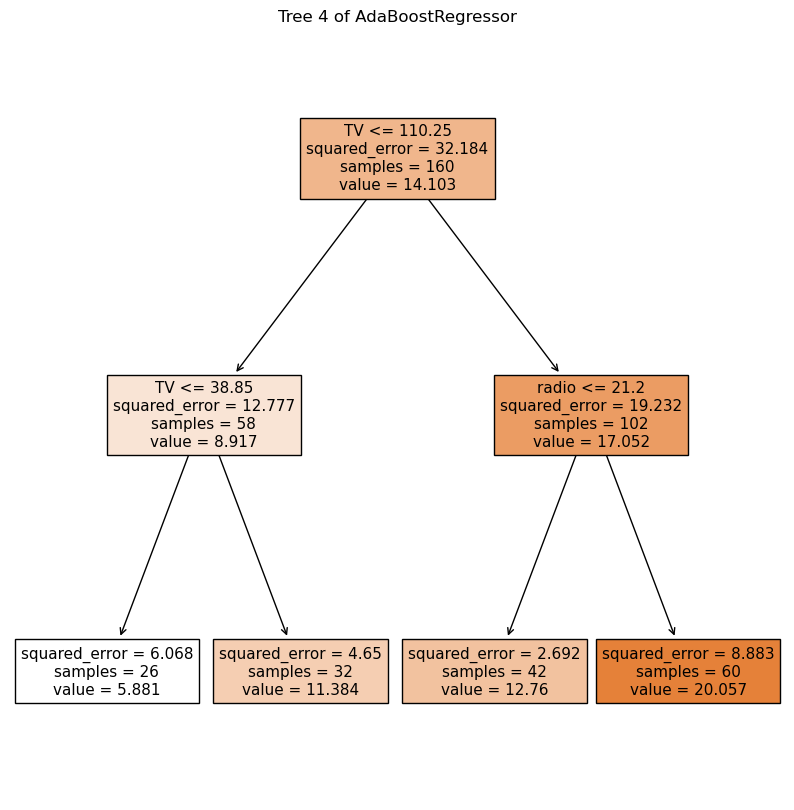

Applied weight is: 1.0539764341979612


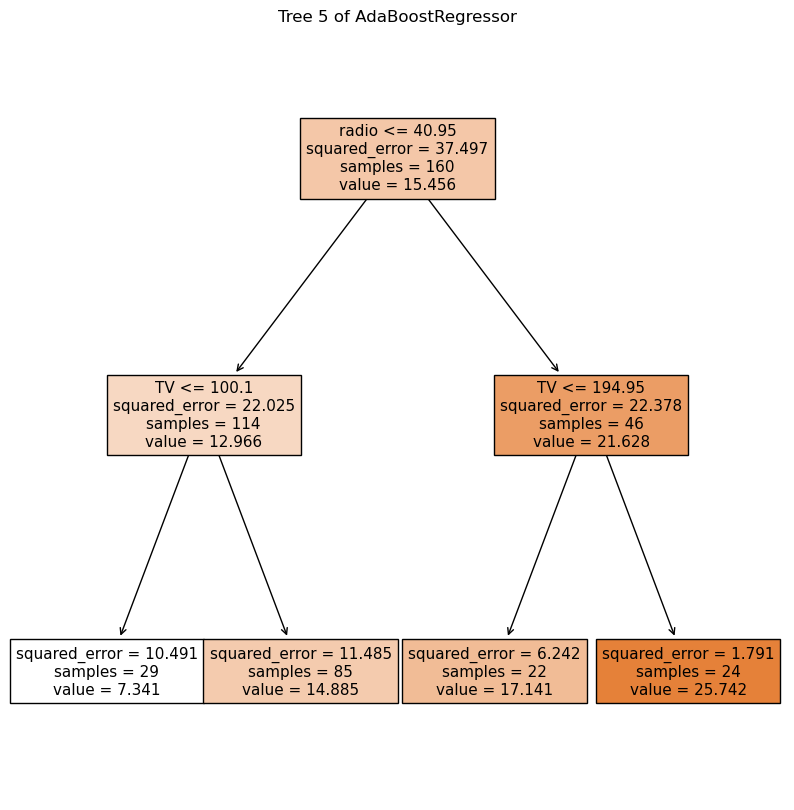

In [13]:
# Display decision trees for AdaBoostRegressor
for i, tree in enumerate(adaboost_reg.estimators_):
    plt.figure(figsize=(10,10))
    plot_tree(tree, feature_names=list(X.columns), filled=True)
    plt.title(f"Tree {i+1} of AdaBoostRegressor")
    print(f"Applied weight is:", adaboost_reg.estimator_weights_[i])
    plt.show()

In [15]:
# Visualize individual trees with weight update information
for i, tree in enumerate(adaboost_reg.estimators_):
    # Display the tree with weight update information
    print(f"Tree {i+1}, Weight: {adaboost_reg.estimator_weights_[i]}")

Tree 1, Weight: 0.8997312450308694
Tree 2, Weight: 0.6868247813398508
Tree 3, Weight: 0.9351720406337855
Tree 4, Weight: 0.7383894360429961
Tree 5, Weight: 1.0539764341979612


In [16]:
# Function to traverse the tree and retrieve impurity and node value
def traverse_tree(node, node_info):
    print("Node is:", node)
    if node == -1:  # Leaf node
        return
    node_info[node] = (tree_model.tree_.impurity[node], tree_model.tree_.value[node])
    left_child = tree_model.tree_.children_left[node]
    right_child = tree_model.tree_.children_right[node]
    traverse_tree(left_child, node_info)
    traverse_tree(right_child, node_info)

# Collect impurity and value for each node
node_info = {}
traverse_tree(0, node_info)  # Start traversal from root node (index 0)

# Sort the collected information based on node index
sorted_node_info = sorted(node_info.items())

# Print node index, impurity, and value
for node, (impurity, value) in sorted_node_info:
    print(f"Node {node}: Impurity = {impurity}, Predicted Value = {value}")

Node is: 0
Node is: 1
Node is: 2
Node is: 3
Node is: -1
Node is: -1
Node is: 4
Node is: -1
Node is: -1
Node is: 5
Node is: 6
Node is: -1
Node is: -1
Node is: 7
Node is: -1
Node is: -1
Node is: 8
Node is: 9
Node is: 10
Node is: -1
Node is: -1
Node is: 11
Node is: -1
Node is: -1
Node is: 12
Node is: 13
Node is: -1
Node is: -1
Node is: 14
Node is: -1
Node is: -1
Node 0: Impurity = 25.93625000000003, Predicted Value = [[14.1]]
Node 1: Impurity = 7.411170280612268, Predicted Value = [[9.43392857]]
Node 2: Impurity = 3.873474999999999, Predicted Value = [[6.795]]
Node 3: Impurity = 1.7066666666666634, Predicted Value = [[3.2]]
Node 4: Impurity = 1.5726643598615837, Predicted Value = [[7.42941176]]
Node 5: Impurity = 3.358333333333377, Predicted Value = [[10.9]]
Node 6: Impurity = 1.8580859375000358, Predicted Value = [[10.44375]]
Node 7: Impurity = 0.37249999999983174, Predicted Value = [[14.55]]
Node 8: Impurity = 17.875132211538528, Predicted Value = [[16.6125]]
Node 9: Impurity = 3.956638

## Example of categorical data and use of DecisionTreeClassifier

So far, in our example above, we have used a DecisionTreeRegressor. It is applied to continuous data. A DecisionTreeClassifier is applied to categorical data. We use it to illustrate the use of gini index and entropy.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Creating the updated categorical dataset
data = {
    'Teacher': ['Noncebo', 'Ms. Wiame', 'Christian', 'Caleb', 'Ntuthuko', 'Kobby', 'Daudi', 'Amina', 'Habibu', 'Sarah', 'Wiame', 'Fatma', 'Ms. Noncebo', 'Zara', 'Jamila'],
    'Language': ['Xhosa', 'Arabic', 'Kinyarwanda', 'Swahili', 'Xhosa', 'Fante', 'Swahili', 'Swahili', 'Swahili', 'French', 'Spanish', 'Swahili', 'Spanish', 'French', 'Swahili']
}

# Creating DataFrame from the updated dataset
df = pd.DataFrame(data)

# Encoding categorical variables
df_encoded = pd.get_dummies(df['Teacher'])

# Target variable
y2 = df['Language']

# Features
X2 = df_encoded

# Splitting dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=42)

In [18]:
df

,Teacher,Language
0,Noncebo,Xhosa
1,Ms. Wiame,Arabic
2,Christian,Kinyarwanda
3,Caleb,Swahili
4,Ntuthuko,Xhosa
5,Kobby,Fante
6,Daudi,Swahili
7,Amina,Swahili
8,Habibu,Swahili
9,Sarah,French


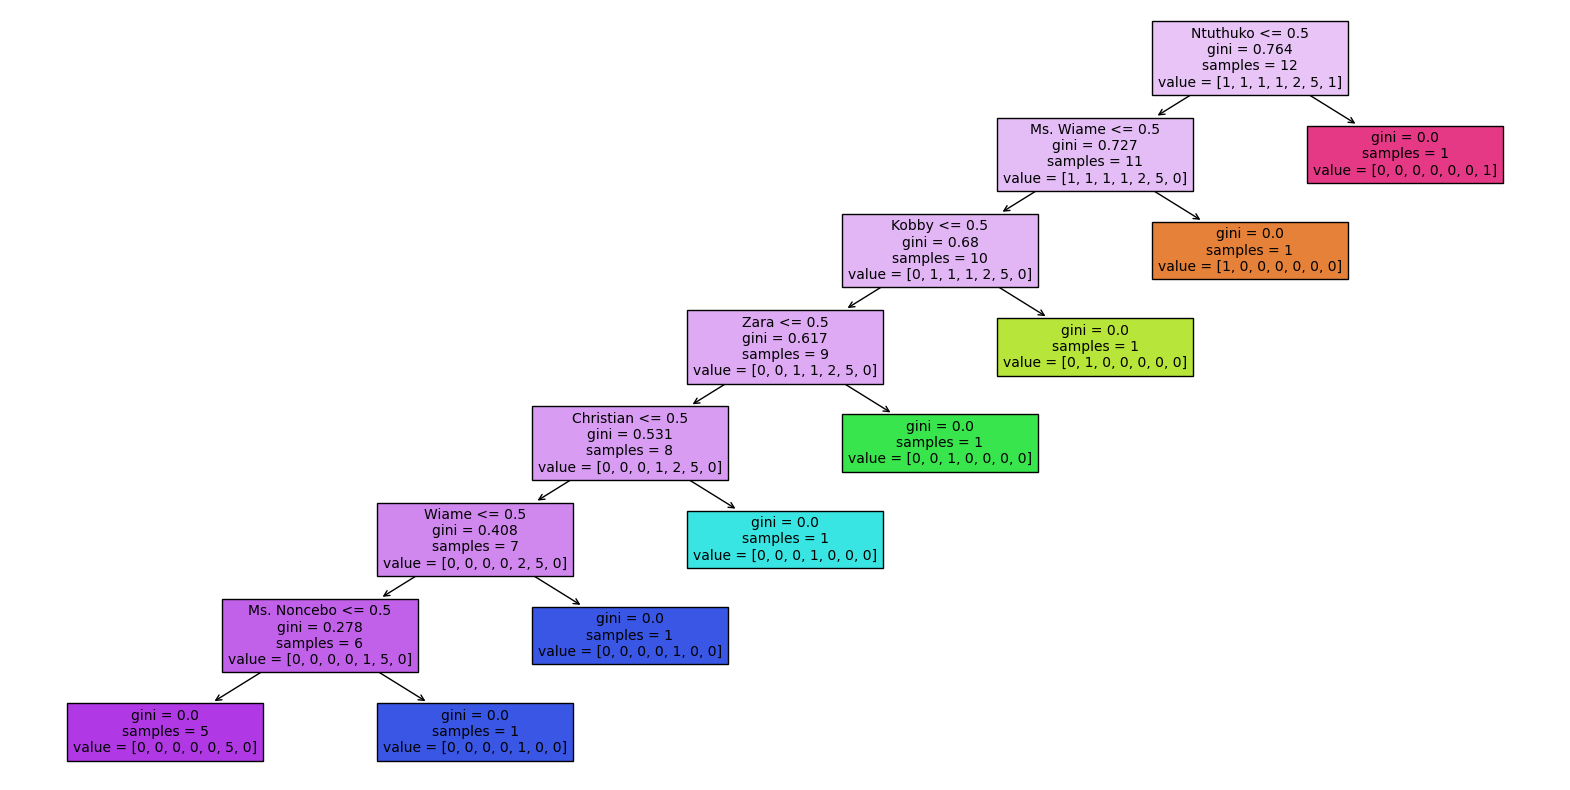

In [19]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X2.columns), filled=True, fontsize=10)
plt.show()

### Make DecisionTreeClassifier to use entropy instead of the gini index

In [21]:
# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=42)

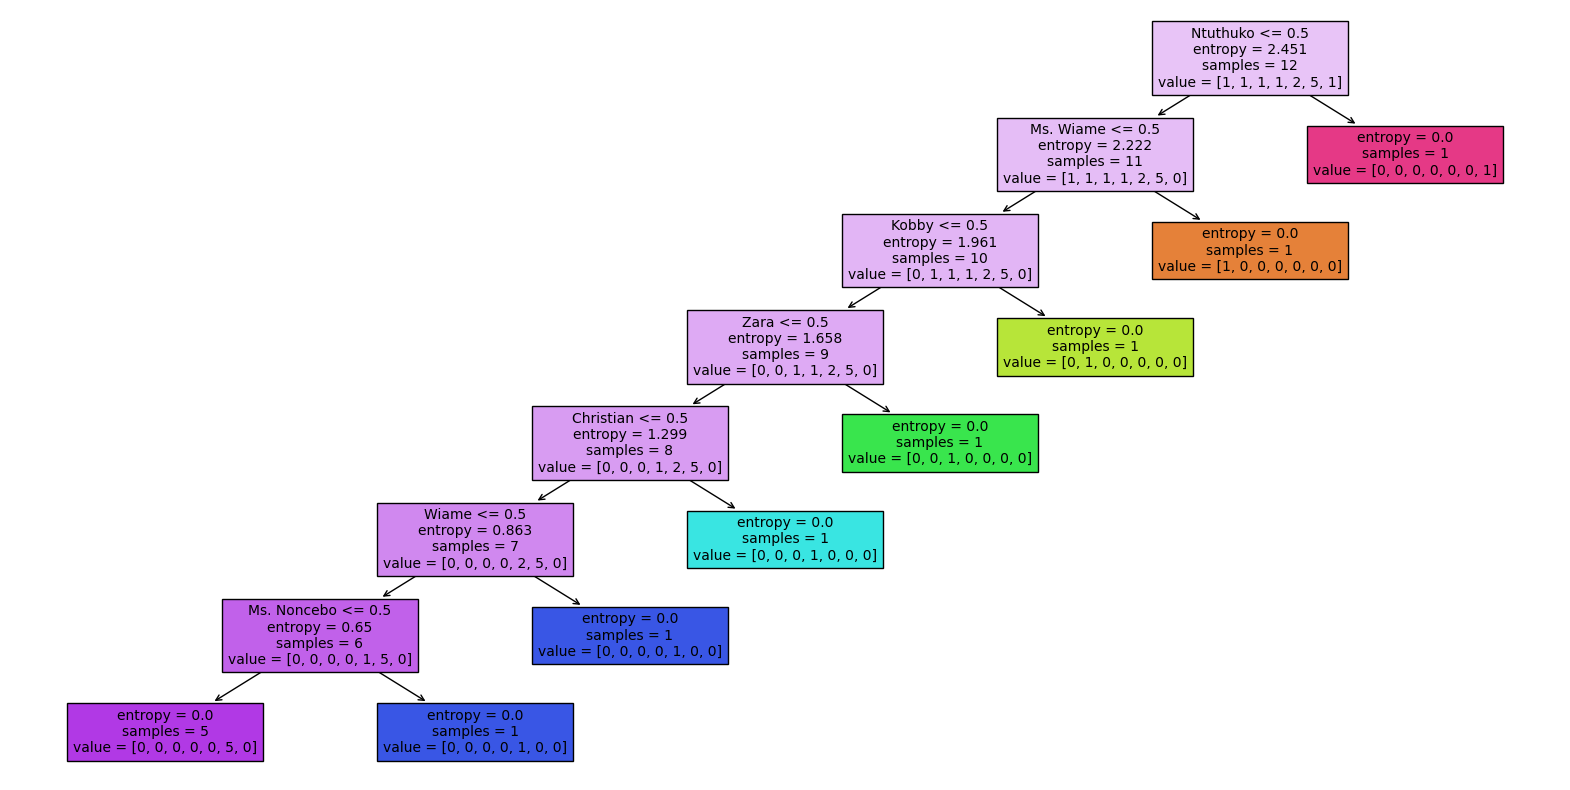

In [22]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X2.columns), filled=True, fontsize=10)
plt.show()

Notice that entropy does not range between 0 and 1 like the gini index.